The following is a project to know whether a email is spam or not.

The model is to be built using Logistic Regression.


The following libraries to be imported.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adityasahay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adityasahay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**COLLECT DATA**

In [39]:
df=pd.read_csv("/Users/adityasahay/Desktop/Data/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Data Preprocessing**: Remove stopwords, punctuation, lowercase text, etc

In [40]:
x=df['Message']

In [41]:
x=x.str.lower()

str.lower will make the entire coloumn lower case.

In [42]:
x=x.apply(word_tokenize)

In [43]:
x.head()

0    [go, until, jurong, point, ,, crazy, .., avail...
1             [ok, lar, ..., joking, wif, u, oni, ...]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, ..., u, c, alrea...
4    [nah, i, do, n't, think, he, goes, to, usf, ,,...
Name: Message, dtype: object

.apply(word_tokenize) makes the entire coloumn in tokens as seen above

In [44]:
stop_words = set(stopwords.words('english'))
x =x.apply(lambda tokens: [word for word in tokens if word not in stop_words])


In [45]:
x.head()

0    [go, jurong, point, ,, crazy, .., available, b...
1             [ok, lar, ..., joking, wif, u, oni, ...]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3    [u, dun, say, early, hor, ..., u, c, already, ...
4    [nah, n't, think, goes, usf, ,, lives, around,...
Name: Message, dtype: object

x =x.apply(lambda tokens: [word for word in tokens if word not in stop_words])

**WITH THE ABOVE STATEMENT, we can remove stopwords**

In [53]:
punctuations = set(string.punctuation)

# Remove punctuation tokens from a list of tokens
def remove_punct_tokens(tokens):
    return [token for token in tokens if token not in punctuations]

# If x is a pandas Series of token lists:
x = x.apply(remove_punct_tokens)

**FEATURE EXTRACTION**


In [57]:
x_joined = x.apply(lambda tokens: ' '.join(tokens))

# Now use CountVectorizer on these strings
count = CountVectorizer()
x = count.fit_transform(x_joined)

In [58]:
y= df['Category'].map({'ham': 0, 'spam': 1})


**MODEL BUILDING**: Linear Regression

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

**EVALUATION**: Accuracy, precision, recall, confusion matrix.

In [64]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.9838565022421525


In [67]:
precision = precision_score(y_test, y_pred)
print("Precision: ",precision)

Precision:  1.0


In [69]:
recall = recall_score(y_test, y_pred)
print("Recall: ",recall)

Recall:  0.8791946308724832


**CONFUSION MATRIX**

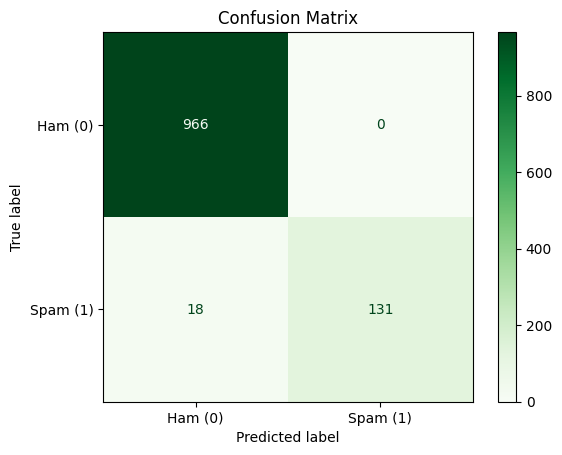

In [73]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham (0)', 'Spam (1)'])
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.show()